# Exploratory Data Analysis and Prediction on the Adult Income Dataset
## Objective
###The primary goal of this analysis is to prepare and explore the Adult Income Dataset, a rich collection of census data aimed at predicting whether an individual's income exceeds $50K/yr based on various demographic and employment factors. This dataset provides a comprehensive playground for demonstrating and applying a wide array of data preprocessing and visualization techniques crucial in the field of machine learning and data science.

##Workflow Overview
###Our analysis workflow is structured as follows:

* ### **Data Loading:** Importing the dataset into our environment to make it ready for analysis.

* ### **Data Visualization:** Employing various visualization techniques to uncover underlying patterns, relationships, and insights within the data.

* ### **Data Cleaning:** Addressing missing values and outliers to ensure the quality and reliability of our dataset.

* ### **Data Transformation:** Applying transformations including encoding categorical variables and scaling numerical variables to prepare our dataset for machine learning models.

* ### **Feature Engineering:** Enhancing the dataset with new features derived from existing data to improve model performance and provide deeper insights.

* ### **Dimensionality Reduction:** Reducing the number of variables in the dataset to simplify our models without significantly sacrificing accuracy.

* ### **Data Sampling:** Implementing techniques to balance the dataset, thereby improving the fairness and performance of our predictive models.

## Analysis Goals
### Through this comprehensive approach, we aim to not only prepare the dataset for predictive modeling but also uncover key insights into the factors that influence an individual's income level. This analysis serves as a blueprint for data preprocessing and visualization strategies that are applicable across a wide range of data science projects.
### Dataset description: https://archive.ics.uci.edu/dataset/2/adult
###Dataset link: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

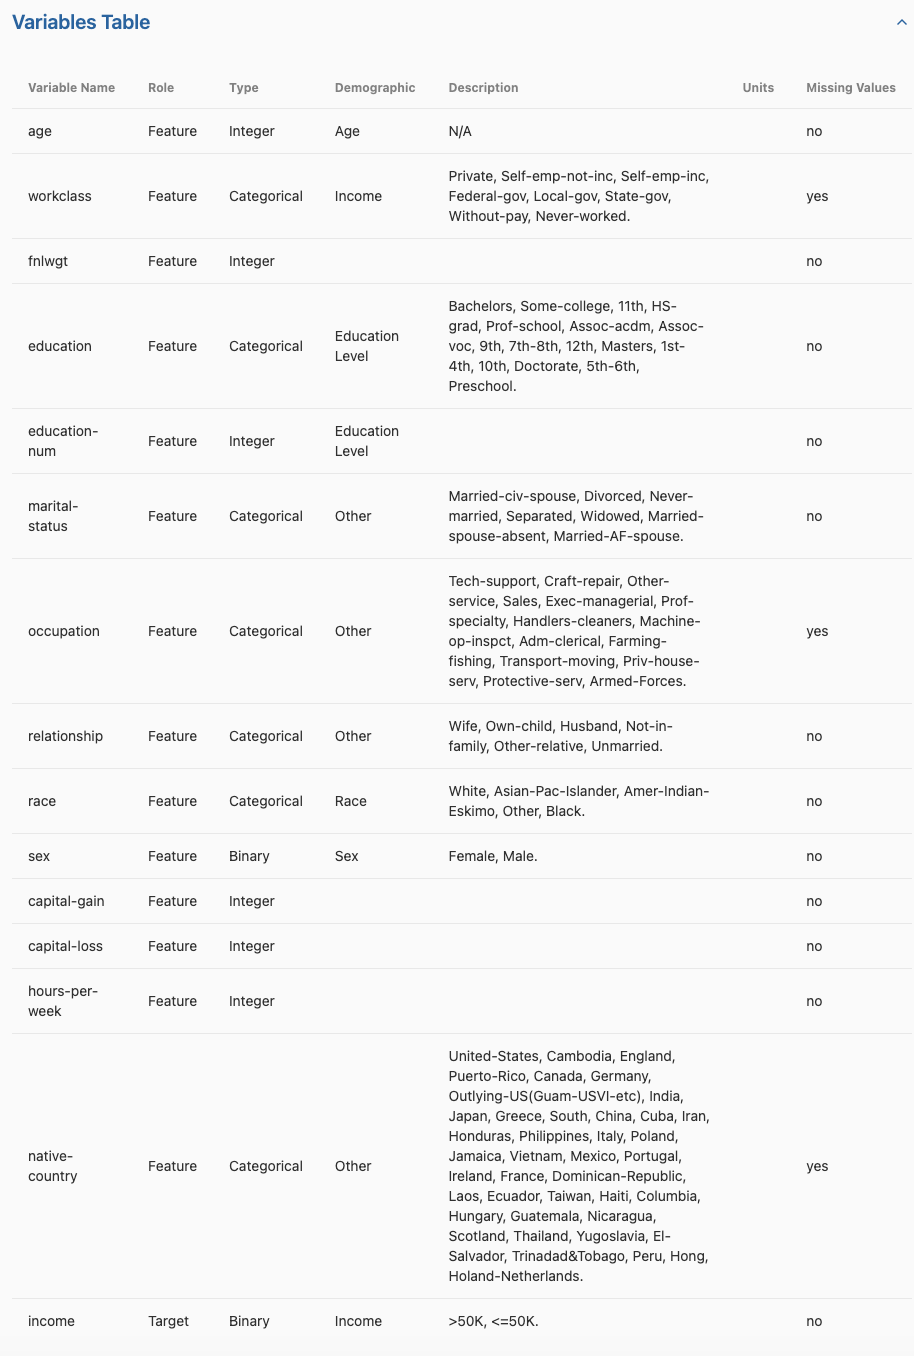

# Load the Dataset

In [571]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure matplotlib inline plotting for Jupyter Notebooks
%matplotlib inline


# Load the dataset
data = pd.read_csv('adult.csv', na_values="?", skipinitialspace=True)

# Display the first few rows of the dataframe
data.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


#Data Inspection

In [572]:
# Display the first 'n' rows of the dataframe
data.head(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [573]:
# Display the last few rows of the dataframe
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [574]:
# Display the last 'n' rows of the dataframe
data.tail(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48822,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K
48823,72,NaN,129912,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,United-States,<=50K
48824,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
48825,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
48826,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
48827,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
48828,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
48829,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
48830,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
48831,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


In [575]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [576]:
print(data.shape)


(48842, 15)


In [577]:
# Print the data types of all columns
print(data.dtypes)

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


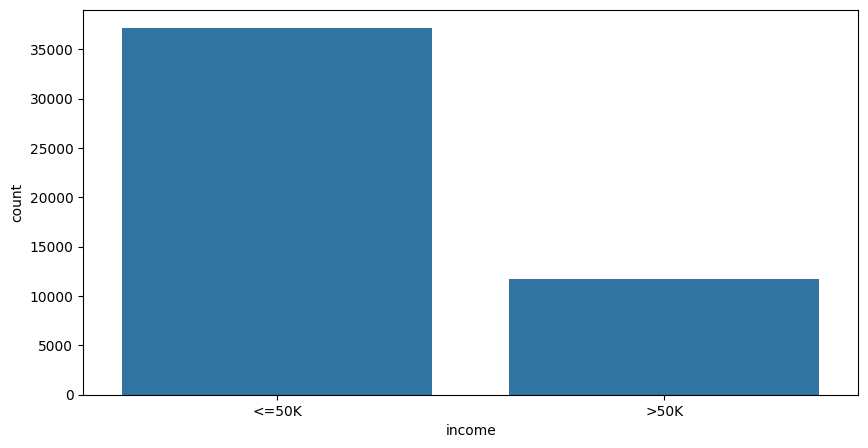

In [578]:
import seaborn as sns

plt.figure(figsize = (10, 5))
sns.countplot(x = data['income'])
plt.show()



#Descriptive Statistics

In [579]:
# Display basic descriptive statistics for numerical features
print(data.describe())

                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


In [580]:
data.describe(include='all')  # For both numerical and categorical columns

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,46043,4.884200e+04,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [581]:
data['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [582]:
data.nunique()

age                   74
workclass              8
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        41
income                 2
dtype: int64

In [583]:
# Check for missing values
missing_values = data.isnull().sum()
print("Count of NA/NaN values after loading:\n", missing_values)

Count of NA/NaN values after loading:
 age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


#Data Selection and Filtering

In [584]:
data.iloc[0:5, 0:3]  # First 5 rows and first 3 columns

,age,workclass,fnlwgt
0,25,Private,226802
1,38,Private,89814
2,28,Local-gov,336951
3,44,Private,160323
4,18,NaN,103497


In [585]:
data.iloc[4:10, 3:6]  # First 5 rows and first 3 columns

,education,educational-num,marital-status
4,Some-college,10,Never-married
5,10th,6,Never-married
6,HS-grad,9,Never-married
7,Prof-school,15,Married-civ-spouse
8,Some-college,10,Never-married
9,7th-8th,4,Married-civ-spouse


In [586]:
data.loc[data['age'] > 50]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
13,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,132015,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48823,72,NaN,129912,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,United-States,<=50K
48829,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [587]:
data.query('age > 50 & income == ">50K"')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
40,65,Private,136384,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
70,55,Private,323887,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,45,United-States,>50K
87,55,Private,160631,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,56,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48799,57,Local-gov,110417,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
48814,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
48820,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


#Categorical Data Encoding

In [588]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [589]:
categorical_cols = data.select_dtypes(include=['object']).columns

In [590]:
categorical_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [591]:
#print unique values of features
df = data

for cols in df.columns:
    unique_vals = df[cols].unique()
    if df[cols].dtype == object:
        print("Feature ", cols, " has ", len(unique_vals), " unique values ----> ", unique_vals , " ----> Datatype: ", df[cols].dtypes)

Feature  workclass  has  9  unique values ---->  ['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']  ----> Datatype:  object
Feature  education  has  16  unique values ---->  ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']  ----> Datatype:  object
Feature  marital-status  has  7  unique values ---->  ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']  ----> Datatype:  object
Feature  occupation  has  15  unique values ---->  ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']  ----> Datatype:  object
Feature  relationship  has  6  unique values ----

In [592]:
df['workclass'].replace({'Private':0, 'Local-gov':1, 'Self-emp-not-inc':2, 'Federal-gov':3, 'State-gov':4,
 'Self-emp-inc':5, 'Without-pay':6, 'Never-worked':7}, inplace = True)

In [593]:
df['education'].replace({'11th':0, 'HS-grad':1, 'Assoc-acdm':2, 'Some-college':3, '10th':4, 'Prof-school':5,
 '7th-8th':6, 'Bachelors':7, 'Masters':8, '5th-6th':9, 'Assoc-voc':10, '9th':11, 'Doctorate':12,
 '12th':13, '1st-4th':14, 'Preschool':15}, inplace = True)

In [594]:
df['marital-status'].replace({'Never-married':0, 'Married-civ-spouse':1, 'Widowed':2, 'Divorced':3, 'Separated':4,
 'Married-spouse-absent':5, 'Married-AF-spouse':6}, inplace = True)

In [595]:
df['relationship'].replace({'Own-child':0, 'Husband':1, 'Not-in-family':2, 'Unmarried':3, 'Wife':4, 'Other-relative':5}, inplace = True)

In [596]:
race_mapping = {'Black': 0, 'White': 1, 'Other': 2, 'Amer-Indian-Eskimo': 3, 'Asian-Pac-Islander': 4}
df['race'] = df['race'].replace(race_mapping)

In [603]:
# Encoding for 'gender'
gender_mapping = {'Machine-op-inspct':0, 'Farming-fishing':1, 'Protective-serv':2,
 'Other-service':3, 'Prof-specialty':4, 'Craft-repair':5, 'Adm-clerical':6,
 'Exec-managerial':7, 'Tech-support':8, 'Sales':9, 'Priv-house-serv':10,
 'Transport-moving':11, 'Handlers-cleaners': 12, 'Armed-Forces':13}
df['occupation'] = df['occupation'].replace(gender_mapping)

In [604]:
gender_mapping = {'Male': 0, 'Female': 1}
df['gender'] = df['gender'].replace(gender_mapping)

In [598]:
# Encoding for 'native-country'
native_country_mapping = {'United-States': 0, 'Peru': 1, 'Guatemala': 2, 'Mexico': 3, 'Dominican-Republic': 4,
                          'Ireland': 5, 'Germany': 6, 'Philippines': 7, 'Thailand': 8, 'Haiti': 9, 'El-Salvador': 10,
                          'Puerto-Rico': 11, 'Vietnam': 12, 'South': 13, 'Columbia': 14, 'Japan': 15, 'India': 16,
                          'Cambodia': 17, 'Poland': 18, 'Laos': 19, 'England': 20, 'Cuba': 21, 'Taiwan': 22,
                          'Italy': 23, 'Canada': 24, 'Portugal': 25, 'China': 26, 'Nicaragua': 27, 'Honduras': 28,
                          'Iran': 29, 'Scotland': 30, 'Jamaica': 31, 'Ecuador': 32, 'Yugoslavia': 33, 'Hungary': 34,
                          'Hong': 35, 'Greece': 36, 'Trinadad&Tobago': 37, 'Outlying-US(Guam-USVI-etc)': 38,
                          'France': 39, 'Holand-Netherlands': 40}
df['native-country'] = df['native-country'].replace(native_country_mapping)

In [599]:
# Encoding for 'income'
income_mapping = {'<=50K': 0, '>50K': 1}
df['income'] = df['income'].replace(income_mapping)

# Now, each of these columns is encoded with integer values starting from zero

In [605]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0.0,226802,0,7,0,0.0,0,0,0,0,0,40,0.0,0
1,38,0.0,89814,1,9,1,1.0,1,1,0,0,0,50,0.0,0
2,28,1.0,336951,2,12,1,2.0,1,1,0,0,0,40,0.0,1
3,44,0.0,160323,3,10,1,0.0,1,0,0,7688,0,40,0.0,1
4,18,NaN,103497,3,10,0,NaN,0,1,1,0,0,30,0.0,0
5,34,0.0,198693,4,6,0,3.0,2,1,0,0,0,30,0.0,0
6,29,NaN,227026,1,9,0,NaN,3,0,0,0,0,40,0.0,0
7,63,2.0,104626,5,15,1,4.0,1,1,0,3103,0,32,0.0,1
8,24,0.0,369667,3,10,0,3.0,3,1,1,0,0,40,0.0,0
9,55,0.0,104996,6,4,1,5.0,1,1,0,0,0,10,0.0,0


# Data Visualization

##Histogram and bar plot -> Univariate data

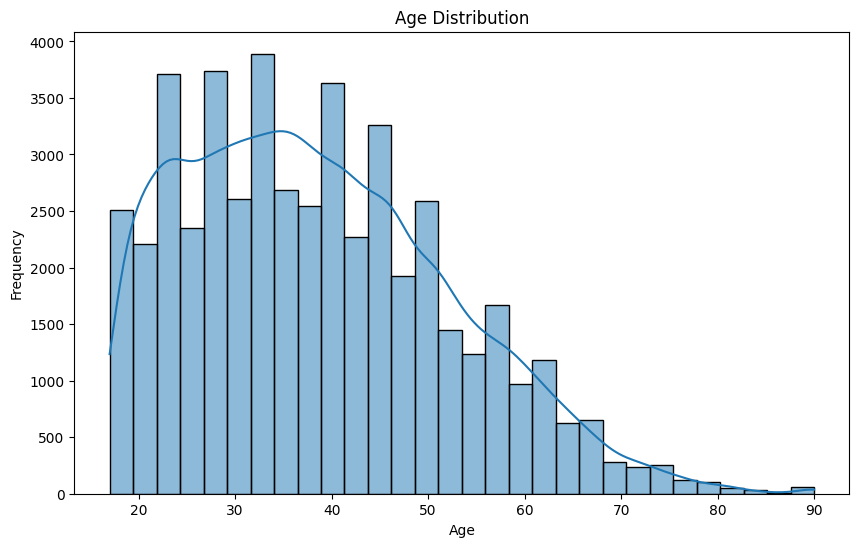

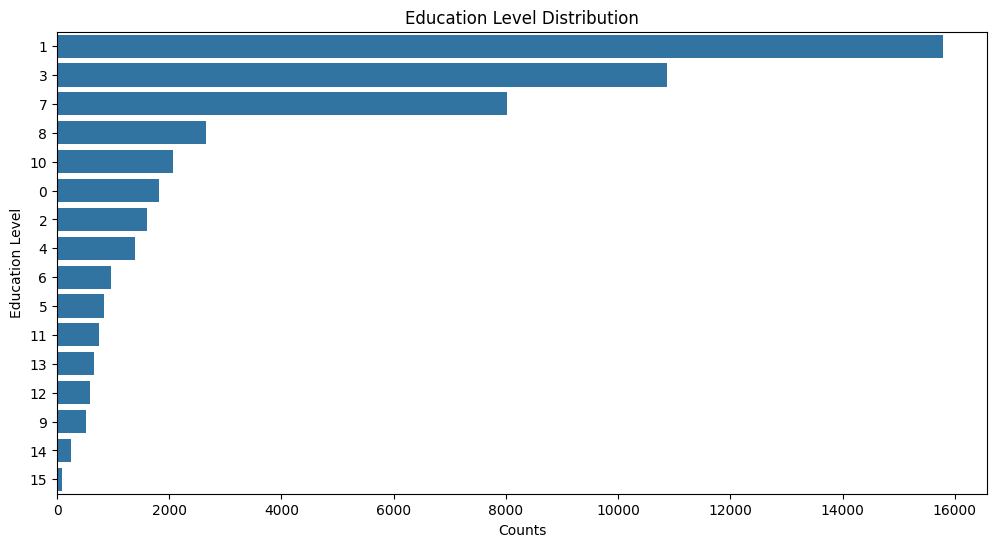

In [532]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar chart for education level
plt.figure(figsize=(12, 6))
sns.countplot(y='education', data=df, order = df['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xlabel('Counts')
plt.ylabel('Education Level')
plt.show()


##Scatter plot -> 2-variable analysis

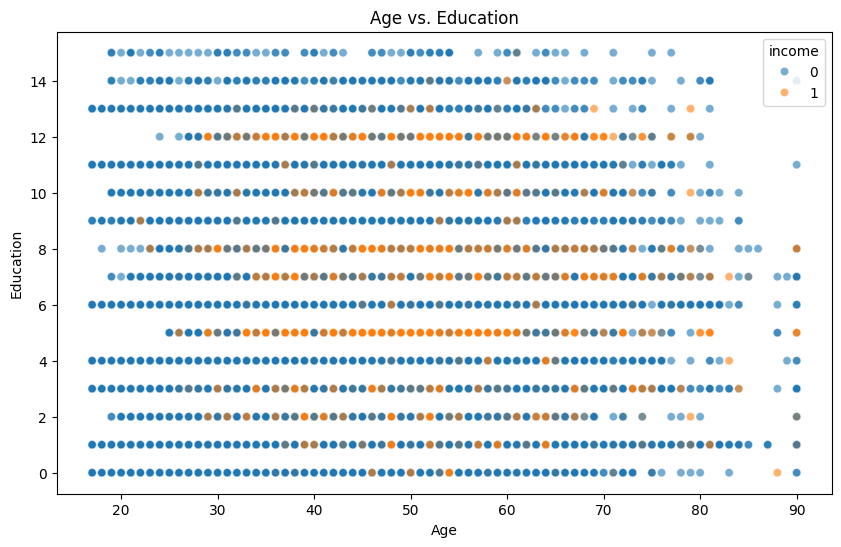

In [607]:
# Scatter plot for age vs hours-per-week
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='education', data=df, hue='income', alpha=0.6)
plt.title('Age vs. Education')
plt.xlabel('Age')
plt.ylabel('Education')
plt.show()

#Pairwise plot -> multi-variate

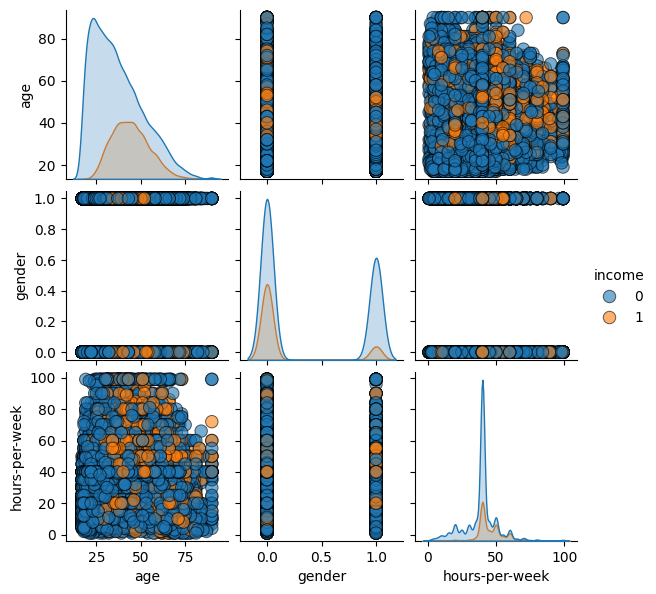

In [608]:
# Selecting a subset of features for clarity
subset_data = df[['age', 'gender', 'hours-per-week', 'income']]

# Pair plot
sns.pairplot(subset_data, hue='income', diag_kind='kde', plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'}, size=2)
plt.show()


#Split the Dataset into Training and Test Sets

In [609]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop('income', axis=1)  # Assuming '>50K' is encoded as such
y = df['income']



#y = f(x) - independent variable(features)
#y - dependent variable (target variable)

In [661]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Data Cleaning

In [662]:
X_train.shape

(39073, 14)

In [663]:
missing_values = X_train.isnull().sum()
missing_values

age                   0
workclass          2264
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2273
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      671
dtype: int64

In [664]:
#missing data
total = X_train.isnull().sum().sort_values(ascending=False)
percent = (X_train.isnull().sum()/X_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
occupation,2273,0.058173
workclass,2264,0.057943
native-country,671,0.017173
age,0,0.000000
fnlwgt,0,0.000000


<Axes: >

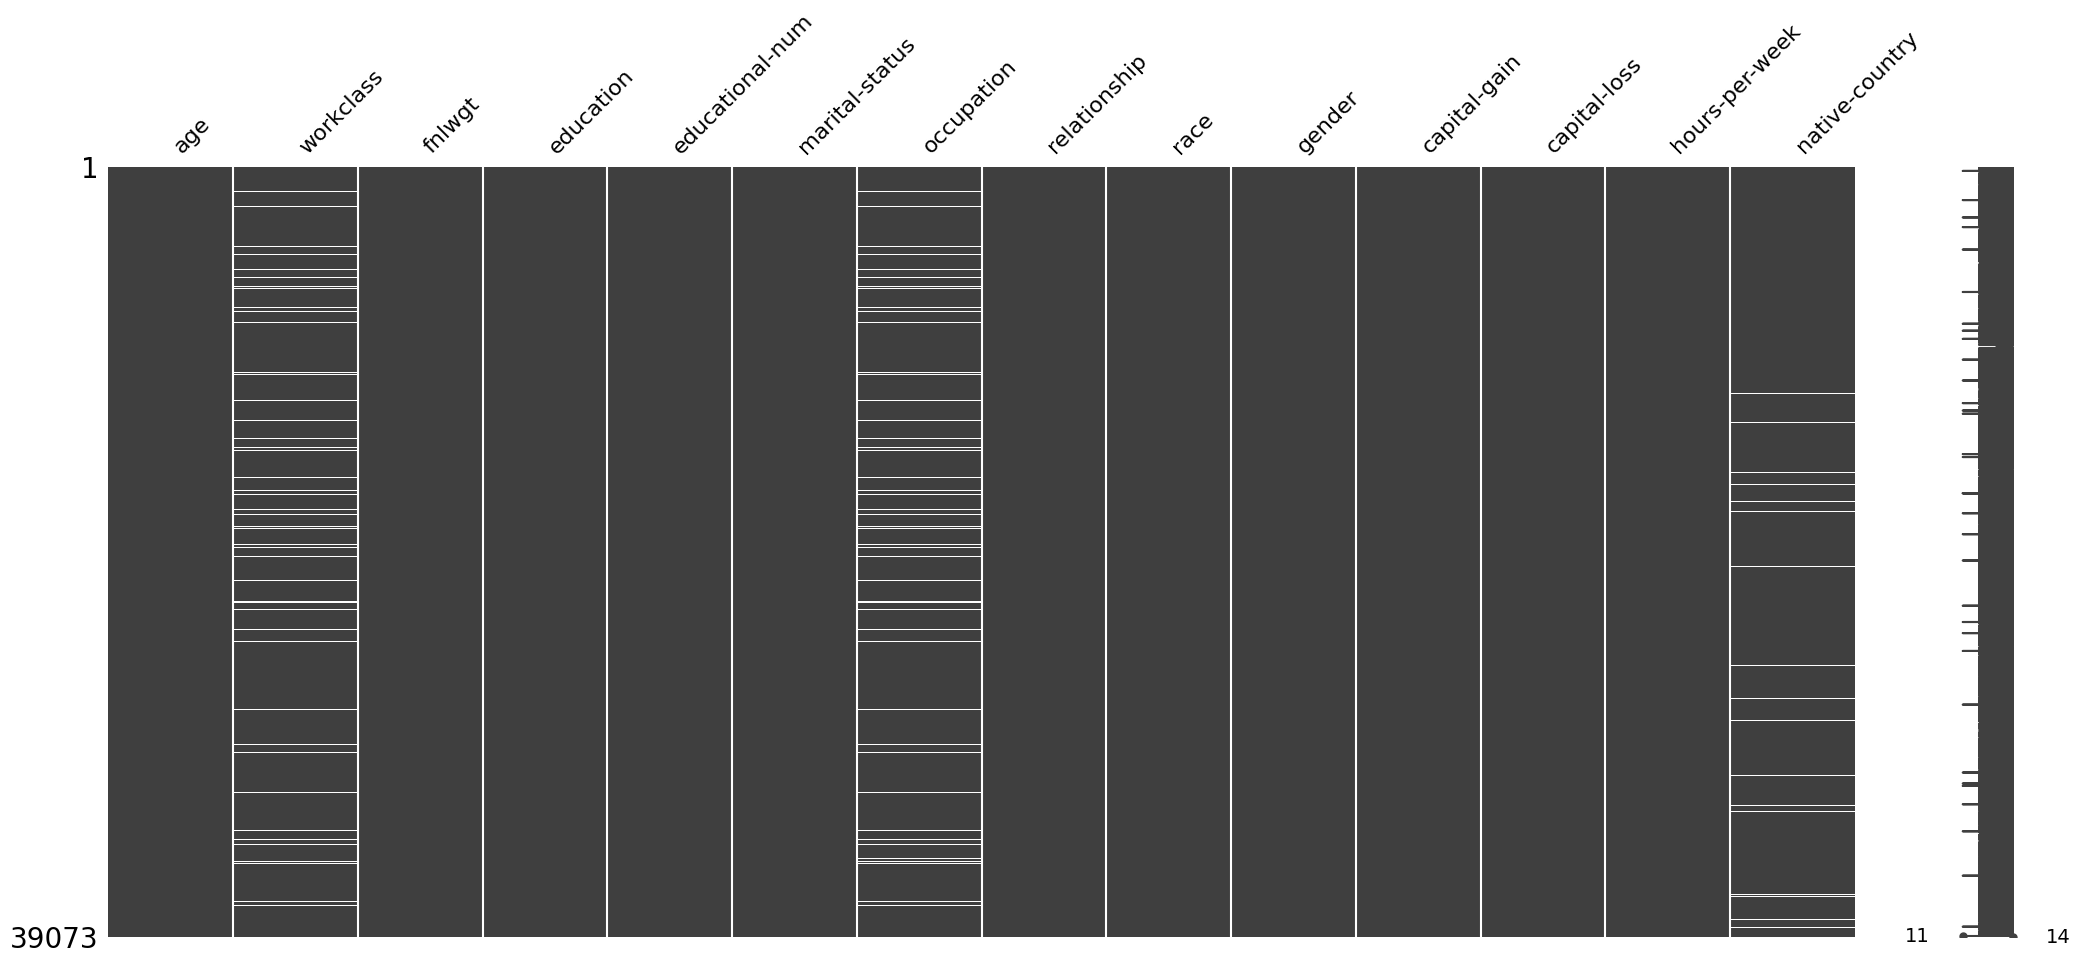

In [665]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(X_train)

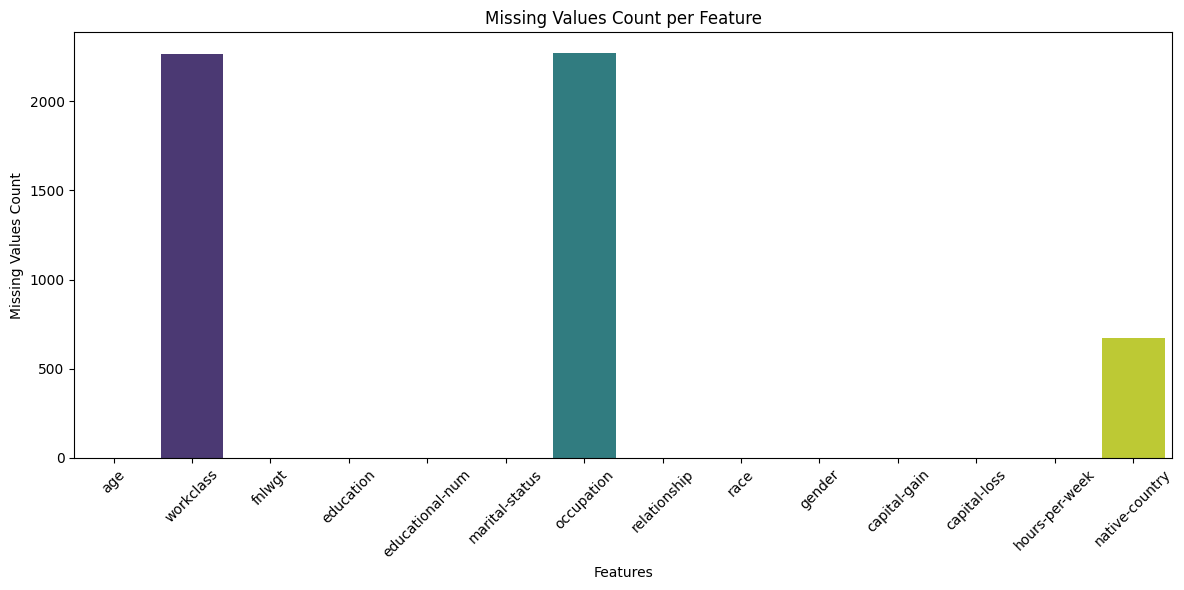

In [666]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot using seaborn
ax = sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")

# Customize the plot
plt.xlabel('Features')
plt.ylabel('Missing Values Count')
plt.title('Missing Values Count per Feature')

# Angle the x-axis tick labels
plt.xticks(rotation=45)  # Rotate labels to 45 degrees for better readability

# Show the plot
plt.tight_layout()
plt.show()


In [667]:
#dropping columns with 5% or more null values
percentage = 5
min = int(((100-percentage)/100)*X_train.shape[0])

X_train.dropna(axis=1, thresh = min, inplace= True)
X_test.dropna(axis=1, thresh = min, inplace= True)

X_train.shape

(39073, 12)

<Axes: >

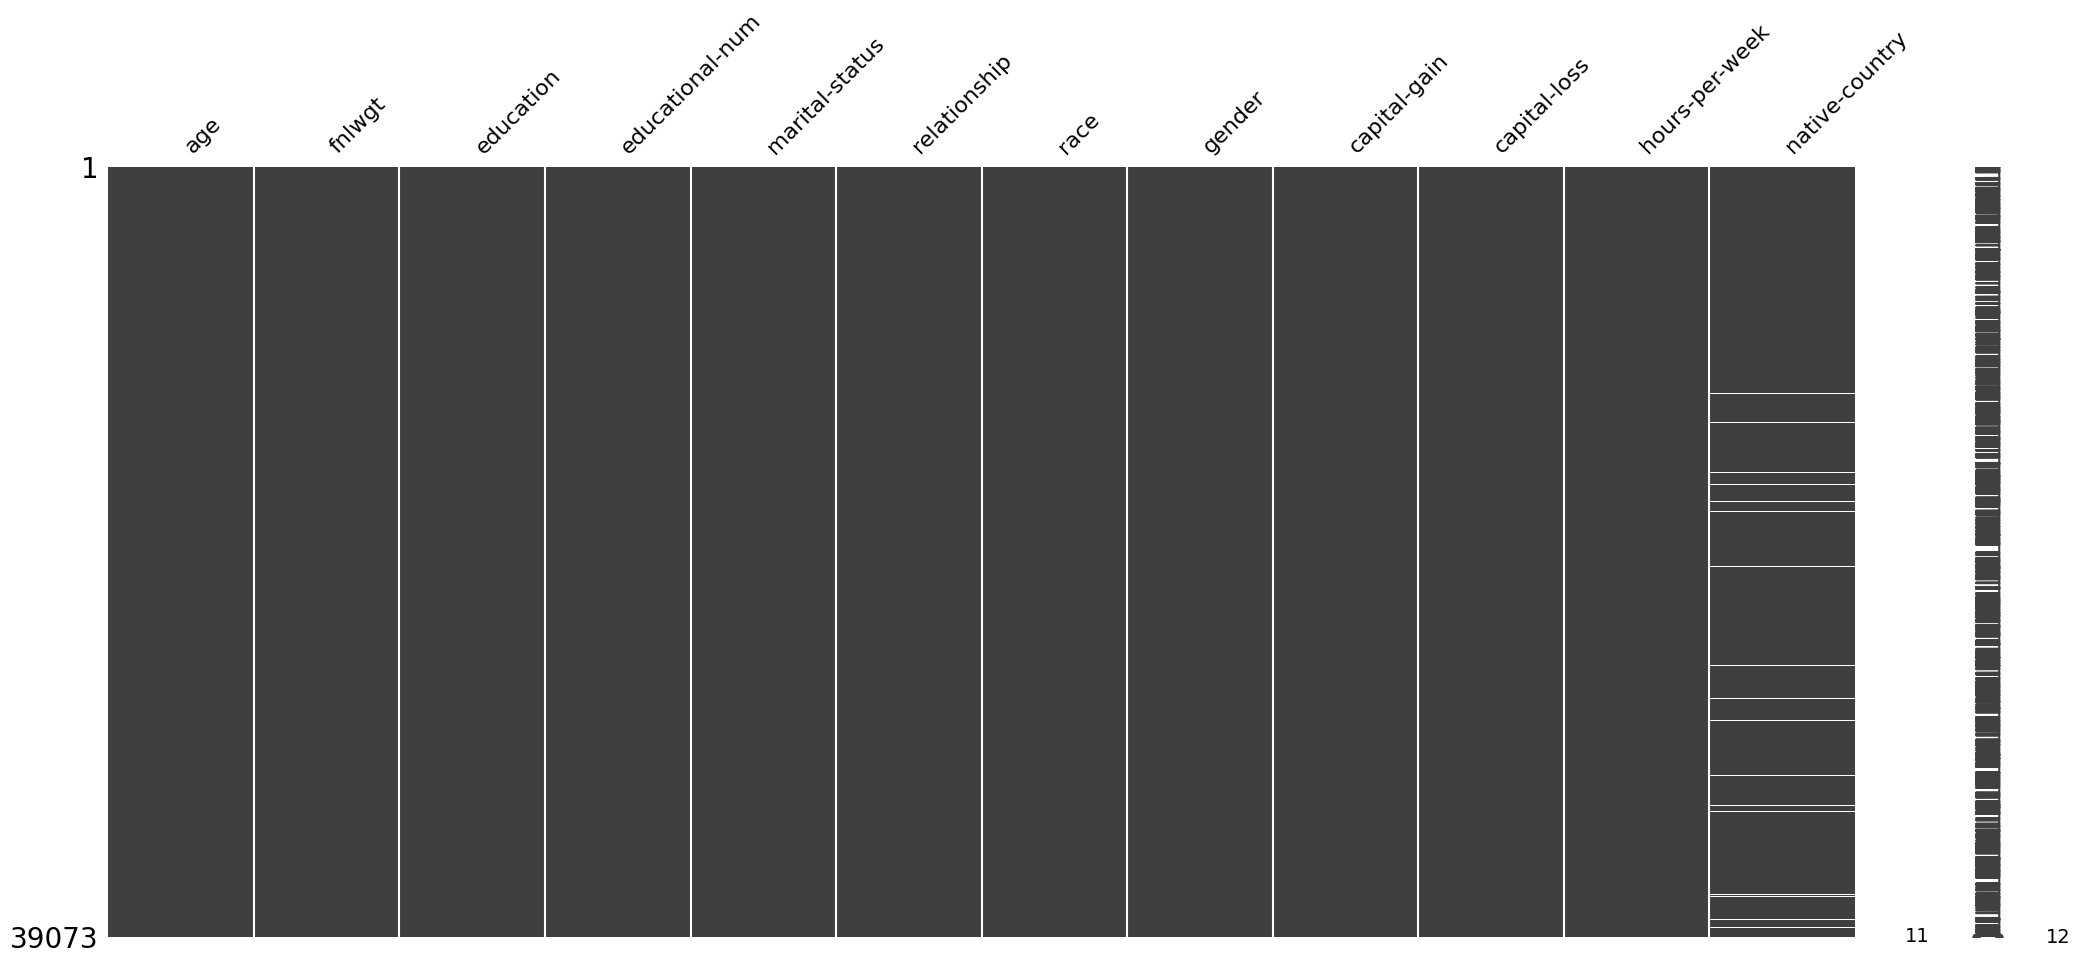

In [668]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(X_train)

In [669]:
missing_values = X_train.isnull().sum()
missing_values

age                  0
fnlwgt               0
education            0
educational-num      0
marital-status       0
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     671
dtype: int64

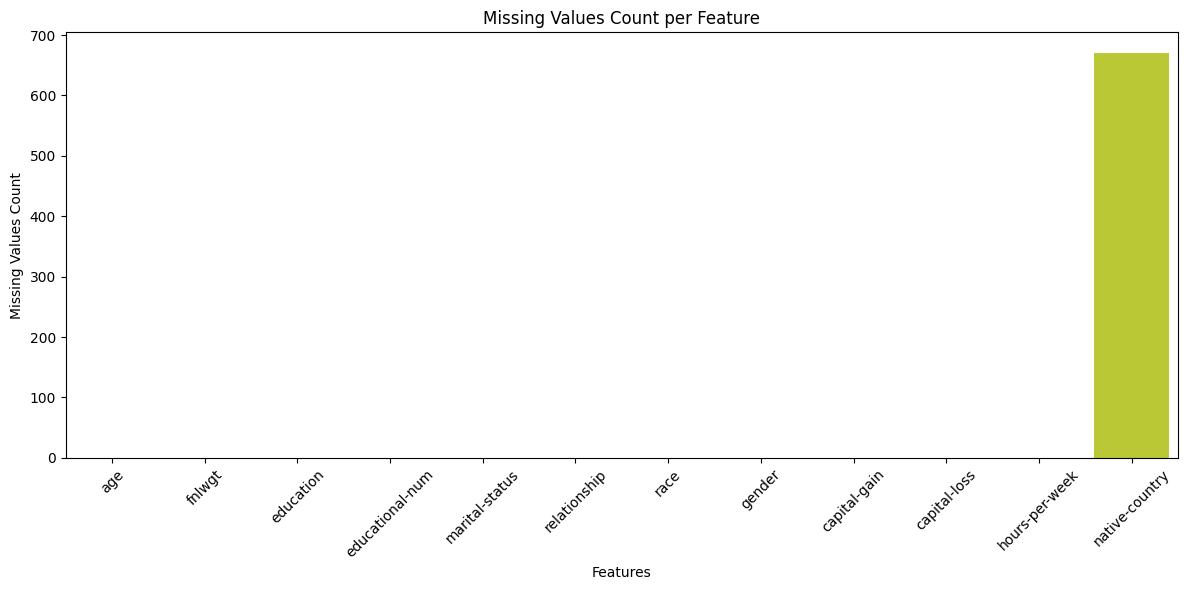

In [670]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot using seaborn
ax = sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")

# Customize the plot
plt.xlabel('Features')
plt.ylabel('Missing Values Count')
plt.title('Missing Values Count per Feature')

# Angle the x-axis tick labels
plt.xticks(rotation=45)  # Rotate labels to 45 degrees for better readability

# Show the plot
plt.tight_layout()
plt.show()


In [671]:
X_train.dropna(inplace=True) #Remove missing values.
X_test.dropna(inplace=True) #Remove missing values.


In [672]:
X_train.shape

(38402, 12)

<Axes: >

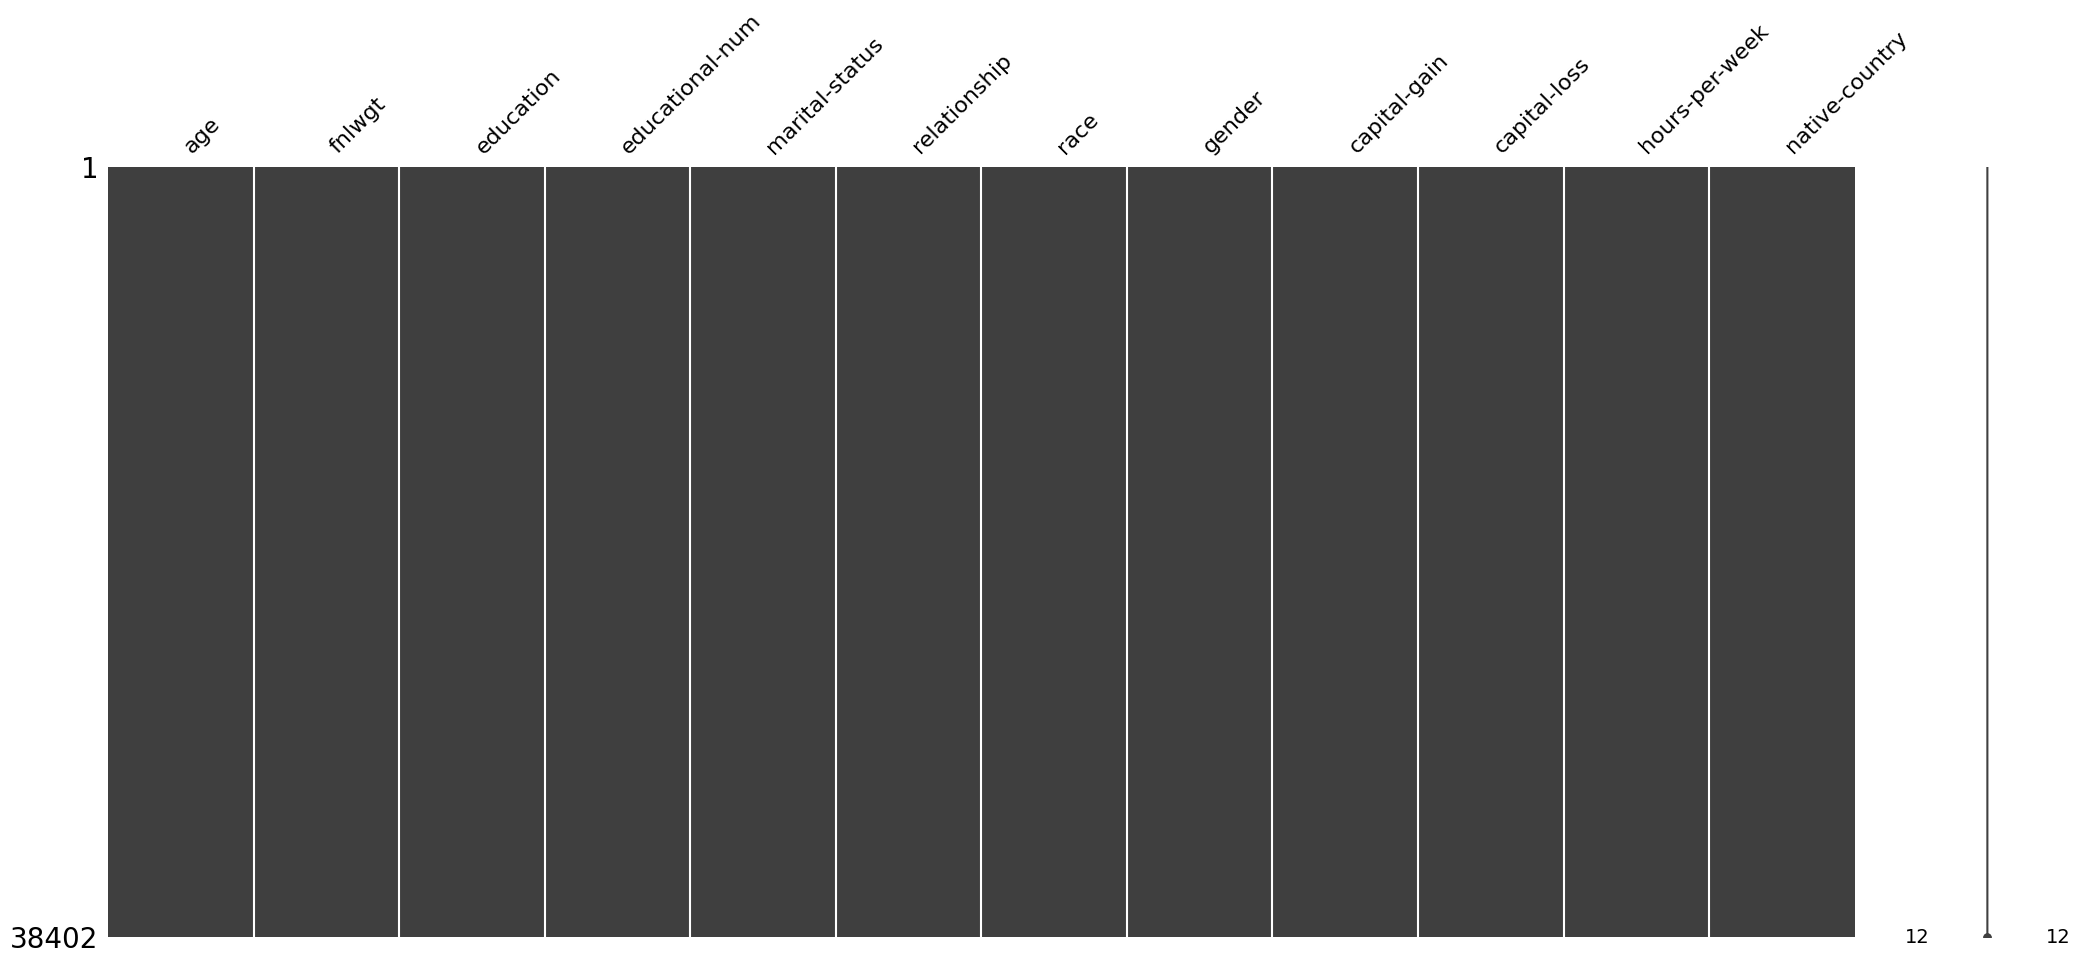

In [673]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(X_train)

In [674]:
missing_values_after = X_train.isnull().sum()
print("Count of missing values after dropping them:\n", missing_values_after)

Count of missing values after dropping them:
 age                0
fnlwgt             0
education          0
educational-num    0
marital-status     0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64


In [675]:
X_train.shape

(38402, 12)

#Handling Outliers

[Text(0.5, 0, 'Features'), Text(0, 0.5, 'Values')]

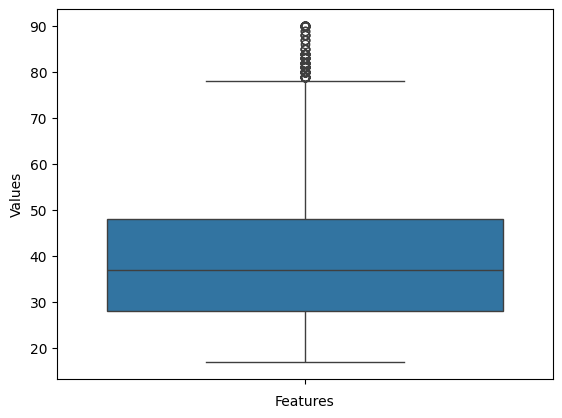

In [676]:
import seaborn as sns

ax = sns.boxplot(data = X_train['age'])

ax.set(xlabel='Features', ylabel='Values')
# Save the figure as an image file
# plt.savefig("outliers.png")


[Text(0.5, 0, 'Features'), Text(0, 0.5, 'Values')]

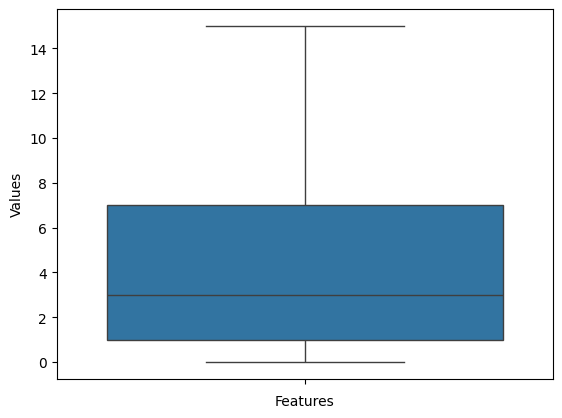

In [677]:
#column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

ax = sns.boxplot(data = X_train['education'])

ax.set(xlabel='Features', ylabel='Values')
# Save the figure as an image file
# plt.savefig("outliers.png")

[Text(0.5, 0, 'Features'), Text(0, 0.5, 'Values')]

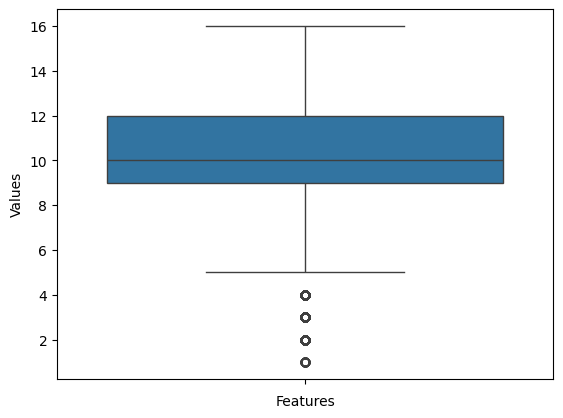

In [678]:
#column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

ax = sns.boxplot(data = X_train['educational-num'])

ax.set(xlabel='Features', ylabel='Values')
# Save the figure as an image file
# plt.savefig("outliers.png")

In [679]:
#replacing outliers that lie more than 2 standard deviations away from the mean
data = X_train

for col in data.columns:
  if data.dtypes[col] == "int64":
    mean = data[col].mean()
    sd = data[col].std()
    median = data[col].median()
    data[col].mask(data[col] > mean+(2*sd), median, inplace=True)
    data[col].mask(data[col] < mean-(2*sd), median, inplace=True)

[Text(0.5, 0, 'Features'), Text(0, 0.5, 'Values')]

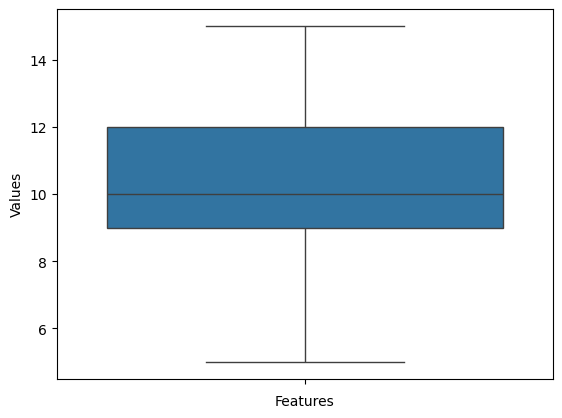

In [680]:
#column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

ax = sns.boxplot(data = data['educational-num'])

ax.set(xlabel='Features', ylabel='Values')
# Save the figure as an image file
# plt.savefig("outliers.png")

#Normalization / Standardization

In [681]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Fit and transform the data
data_normalized_array = scaler.fit_transform(data[numerical_cols])

# Convert the normalized array back into a DataFrame
data_normalized = pd.DataFrame(data_normalized_array, columns=numerical_cols, index=data.index)

# Now 'data_normalized' is a DataFrame with normalized data


In [682]:
X_train = data_normalized

In [683]:
X_train.head()

,age,fnlwgt,education,educational-num,marital-status,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
37193,0.510204,0.342196,0.3,0.5,0.333333,0.333333,0.5,0.0,0.0,0.0,0.489796,0.0
31093,0.714286,0.419071,0.4,0.1,0.333333,0.333333,0.5,0.0,0.0,0.0,0.387755,0.0
33814,0.346939,0.412981,0.1,0.4,0.333333,0.333333,0.5,0.0,0.0,0.0,0.489796,0.0
14500,0.224490,0.292281,0.1,0.4,0.000000,0.666667,0.5,1.0,0.0,0.0,0.489796,0.0
23399,0.591837,0.041546,1.0,0.6,0.000000,0.666667,0.5,0.0,0.0,0.0,0.693878,0.0


#Balance the dataset

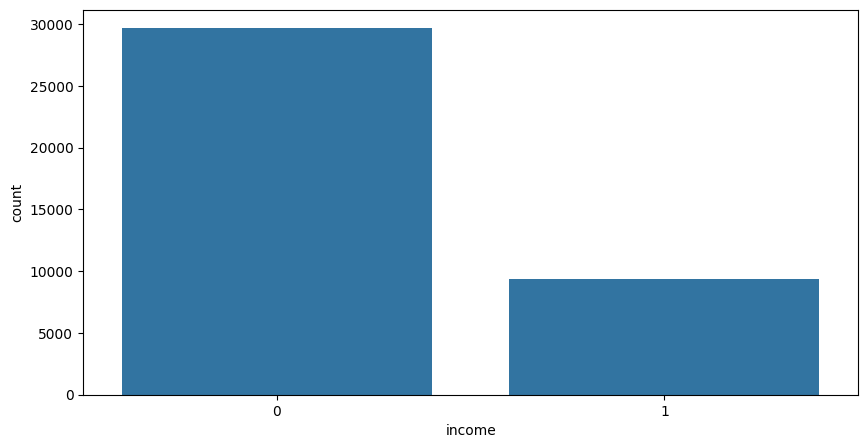

In [684]:
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.countplot(x = y_train)
plt.show()



In [685]:
missing_values_after = X_train.isnull().sum()
print("Count of missing values after dropping them:\n", missing_values_after)

Count of missing values after dropping them:
 age                0
fnlwgt             0
education          0
educational-num    0
marital-status     0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64


In [687]:
from imblearn.over_sampling import SMOTE
#TOMMEK

# Now, align y_train and y_test to match the remaining indices in X_train and X_test
y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

# Apply SMOTE to balance the dataset
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)


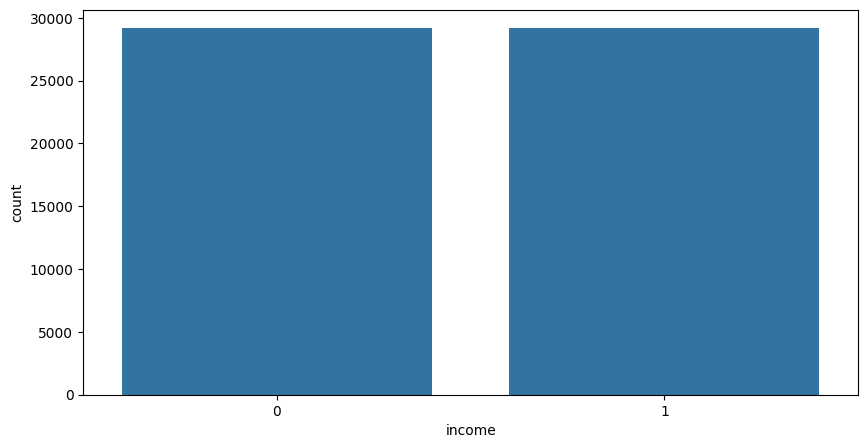

In [688]:
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.countplot(x = y_balanced)
plt.show()


#Pearson's correlation

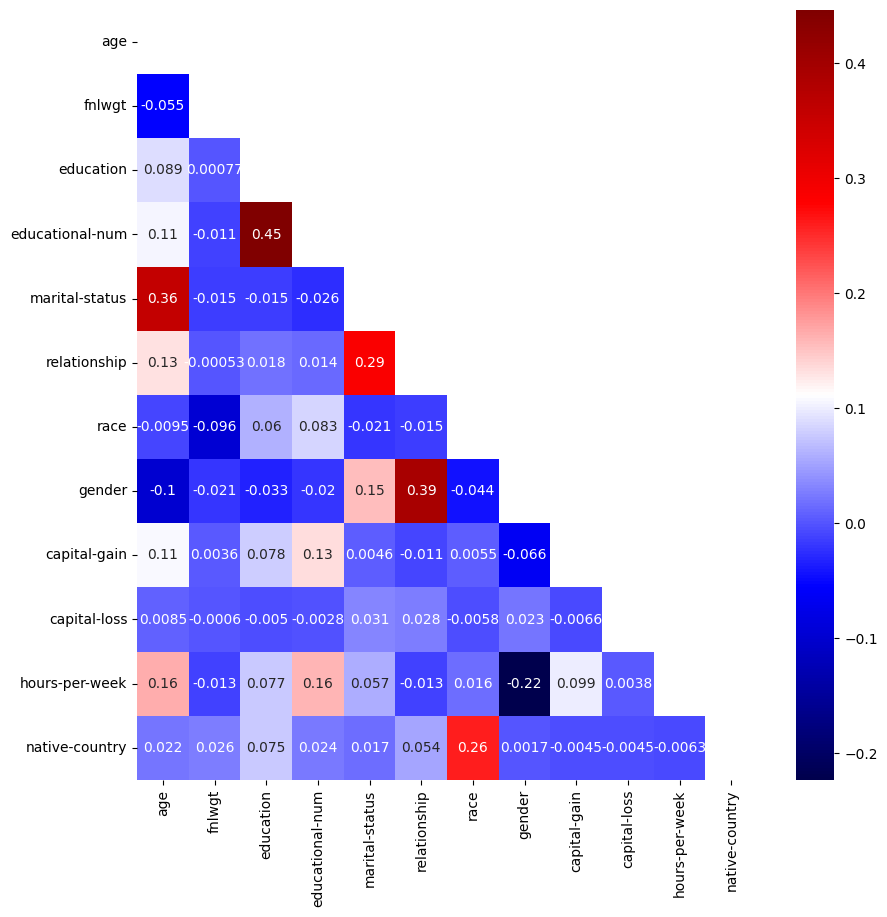

In [ ]:
# Pearson's Correlation Coefficient
import seaborn as sns
import numpy as np

corr = X.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

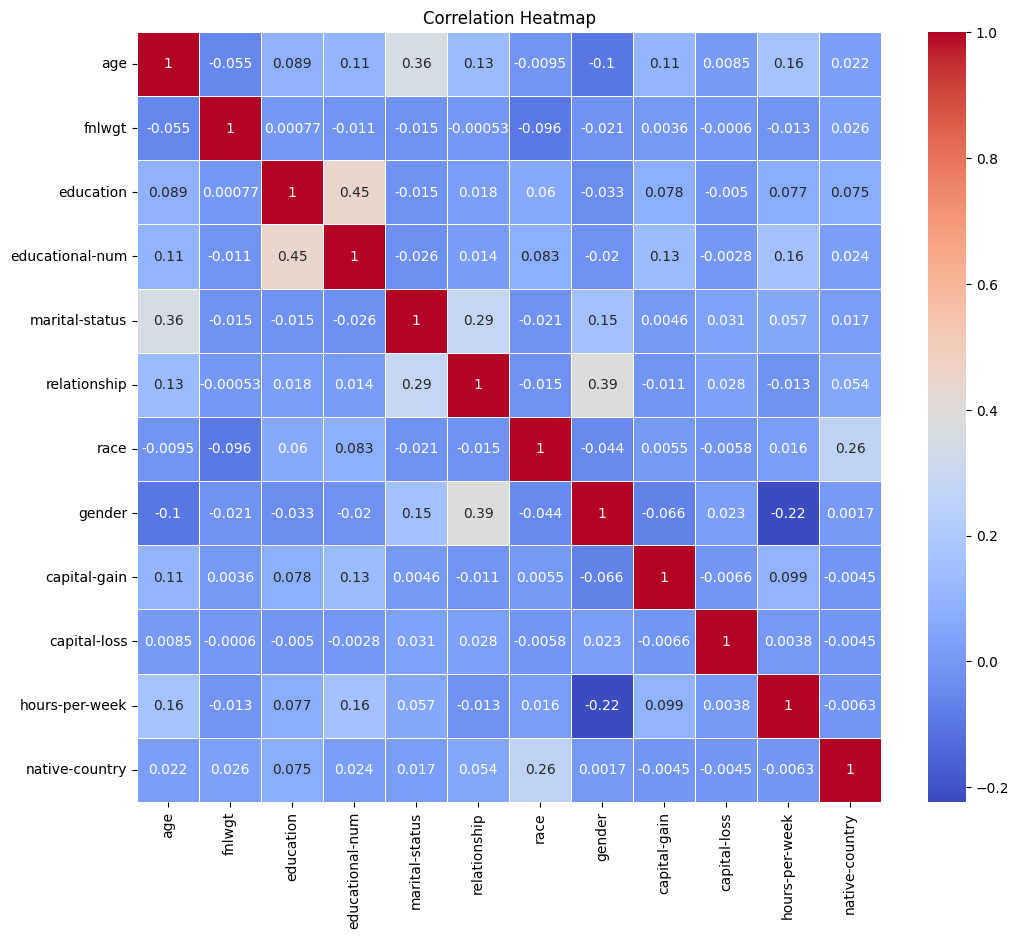

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X, 0.8) # 80% is a good value of the threshold
print(len(corr_features))
print(corr_features)

0
set()


In [ ]:
X.shape

(47985, 12)

In [ ]:
X.drop(corr_features,axis=1, inplace=True)

In [ ]:
X.shape

(47985, 12)

In [ ]:
corr_features = correlation(X, 0.4) # 80% is a good value of the threshold
print(len(corr_features))
print(corr_features)

1
{'educational-num'}


In [ ]:
X_train.drop(corr_features,axis=1, inplace=True)

In [689]:
X_train.shape

(38402, 12)

#Import Models

In [489]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


#Logistic Regression

In [495]:
from sklearn.metrics import classification_report


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))


# Logistic Regression
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.7900385537147026
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.94      0.87      7333
         1.0       0.61      0.30      0.40      2264

    accuracy                           0.79      9597
   macro avg       0.71      0.62      0.64      9597
weighted avg       0.77      0.79      0.76      9597



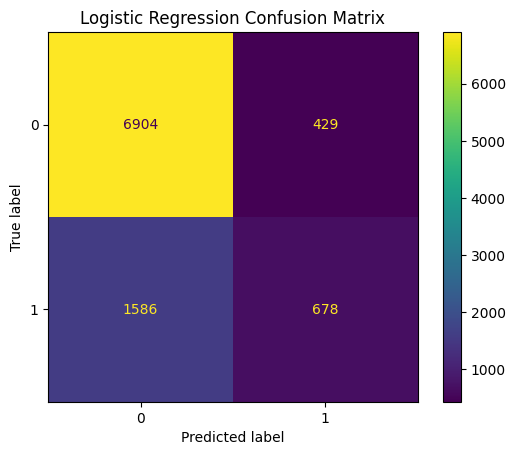

In [499]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg)
disp.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()


#Decision Tree

In [496]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Predict and evaluate
y_pred_decision_tree = decision_tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_decision_tree))

# Decision Tree
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_decision_tree))

Decision Tree Accuracy: 0.789517557570074
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      7333
         1.0       0.55      0.58      0.56      2264

    accuracy                           0.79      9597
   macro avg       0.71      0.72      0.71      9597
weighted avg       0.79      0.79      0.79      9597



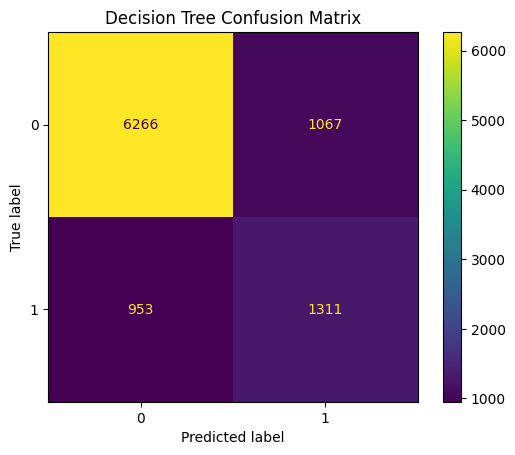

In [500]:
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_decision_tree)
disp.plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()


#Random Forest

In [497]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predict and evaluate
y_pred_random_forest = random_forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random_forest))


# Random Forest
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_random_forest))

Random Forest Accuracy: 0.8288006668750652
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      7333
         1.0       0.65      0.58      0.62      2264

    accuracy                           0.83      9597
   macro avg       0.76      0.74      0.75      9597
weighted avg       0.82      0.83      0.83      9597



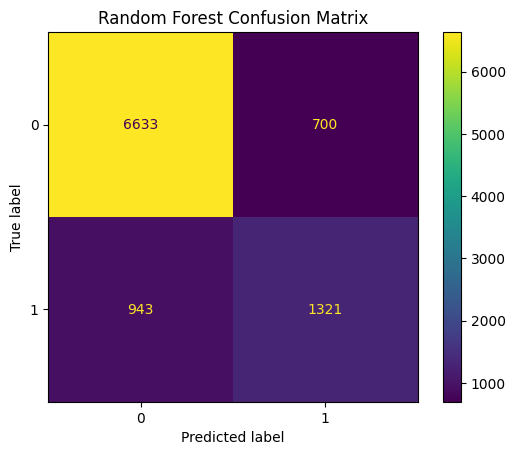

In [501]:
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_random_forest)
disp.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()


#Support Vector Machine

In [498]:
svm = SVC()
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# SVM
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8174429509221631
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.95      0.89      7333
         1.0       0.70      0.39      0.50      2264

    accuracy                           0.82      9597
   macro avg       0.77      0.67      0.70      9597
weighted avg       0.80      0.82      0.80      9597



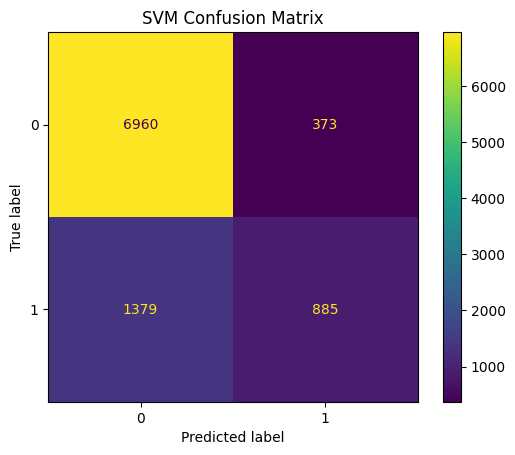

In [502]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()
plt.title('SVM Confusion Matrix')
plt.show()
